# Session 3 Exercises
These are sample answers for the in-class exercises in Session 3 of PHAS0030.  You should make sure that you can do these yourself ! The further work exercises will be in a separate notebook.

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## 3. Grids

### Question 1

Note that I should have specified that you should plot with points, to make the plot clear.

<IPython.core.display.Javascript object>


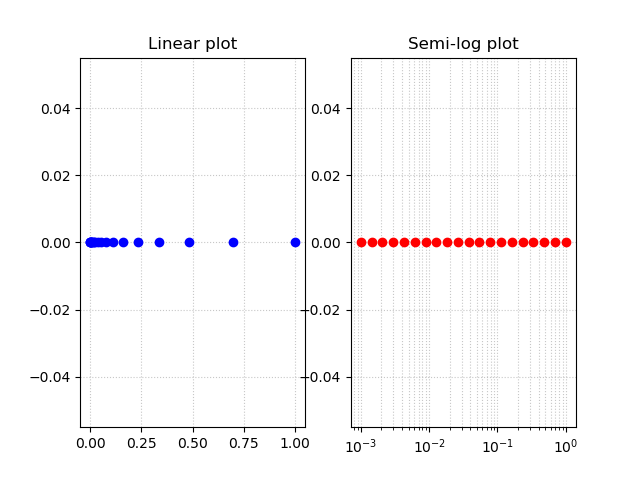

Text(0.5, 1.0, 'Linear plot')

In [2]:
N = 20
x = np.logspace(-3,0,num=N)
y = np.zeros(N)
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(x,y,'bo')
ax1.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')
ax1.set_title("Linear plot")

### Question 2

In [3]:

ax2 = fig1.add_subplot(1,2,2)
ax2.semilogx(x,y,'ro')
ax2.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')
ax2.set_title("Semi-log plot")

Text(0.5, 1.0, 'Semi-log plot')

### Question 3

<IPython.core.display.Javascript object>


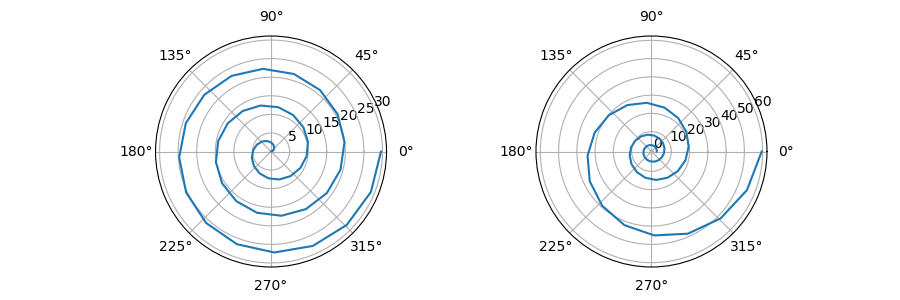

In [4]:
# Define parameters for Archimedes spiral, r = a + b theta
a = 0.0
b = 1./2*np.pi
theta = np.linspace(0,6*np.pi)
r = a + b*theta
fig2 = plt.figure(figsize=(9,3))
ax_q3 = fig2.add_subplot(1,2,1,polar=True)
ax_q3.plot(theta,r)

### Question 4

In [5]:
# Parameters for logarithmic spiral
a_log = 2
b_log = 0.18
r_log = a_log*np.exp(b_log*theta)
ax_q4 = fig2.add_subplot(1,2,2,polar=True)
ax_q4.plot(theta,r_log)

## 4. Differentiation

#### Question 1

In [6]:
def forwardFD(fun,x,dx):
    """Calculate first order finite-difference of given function
    Inputs:
    fun (function to be differentiated)
    x   
    dx  (finite difference)
    Returns:
    finite difference"""
    df = fun(x + dx) - fun(x)
    return df/dx

#### Question 2

Once dx is smaller than 1e-8, the approximation becomes worse; this is likely due to how NumPy calculates sine and cosine, and equivalent errors.

<IPython.core.display.Javascript object>


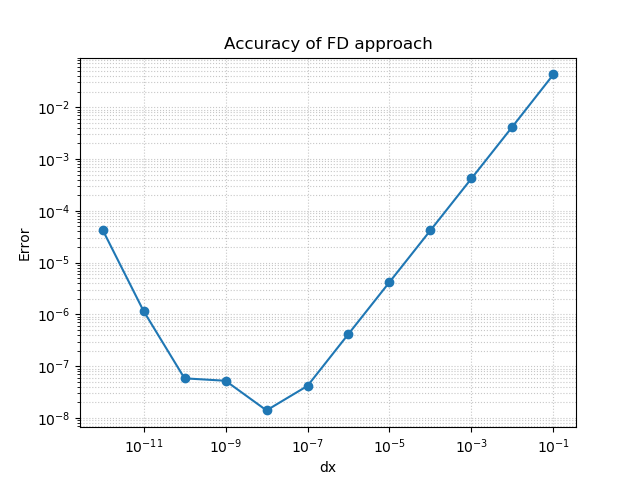

In [7]:
x = 1.0
N = 12
dx_array = np.logspace(-N,-1,N)
results = np.zeros(N)
for i, dx in enumerate(dx_array):
    results[i] = abs(forwardFD(np.sin,x,dx) - np.cos(x))
plt.loglog(dx_array,results,'o-')
plt.grid(True,linestyle=':')
plt.xlabel('dx')
plt.ylabel('Error')
plt.title('Accuracy of FD approach')
plt.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')

#### Question 3

In [8]:
def d2f_cent(f,x,dx):
    """Implements the centred finite difference second derivative"""
    return (f(x + dx) - 2 * f(x) + f(x - dx)) / (dx * dx)

<IPython.core.display.Javascript object>


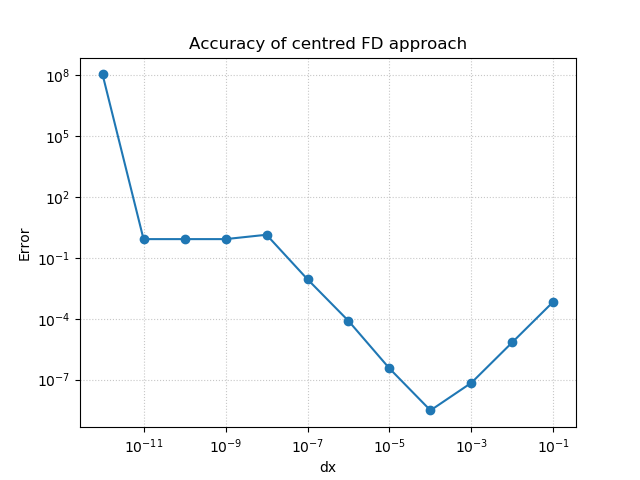

In [9]:
x = 1.0
N = 12
dx_array = np.logspace(-N,-1,N)
results = np.zeros(N)
for i, dx in enumerate(dx_array):
    results[i] = abs(d2f_cent(np.sin,x,dx) + np.sin(x))
plt.loglog(dx_array,results,'o-')
plt.grid(True,linestyle=':')
plt.xlabel('dx')
plt.ylabel('Error')
plt.title('Accuracy of centred FD approach')
plt.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')

There are continuing issues with the accuracy and the value of dx here; the enormous error for dx=1e-12 must be related to rounding error.

## 5. Integration

#### Question 1
Note that I have two approaches here: the first is straightforward, but involves iterating over all elements of the array.  The second creates a NumPy array for x and is likely to be more efficient.

In [10]:
def rectangle_int(f,a,b,N):
    """Implement integration using rectangle rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points)
    Returns value of integral"""
    integral= 0.0
    dx = (b-a)/N
    for i in range(N):
        integral += f(a+i*dx)
    integral *= dx
    return integral

In [11]:
def rectangle_int2(f,a,b,N):
    """Implement integration using rectangle rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points)
    Returns value of integral"""
    integral= 0.0
    # More NumPy approach
    dx = (b-a)/N
    x = np.arange(a,b,dx)
    integral = dx*np.sum(f(x))
    return integral

### Question 2

In [12]:
def dfx(x):
    """Differential of x^3"""
    return 3*x*x
for N in [10,100,1000,10000]:
    print("With ",N," points, integral of 3x^2 from 0 to 1 is ",rectangle_int(dfx,0,1,N))
# Check that the second approach gives the same results
for N in [10,100,1000,10000]:
    print("With ",N," points, integral of 3x^2 from 0 to 1 is ",rectangle_int2(dfx,0,1,N))

With  10  points, integral of 3x^2 from 0 to 1 is  0.8550000000000001
With  100  points, integral of 3x^2 from 0 to 1 is  0.9850499999999999
With  1000  points, integral of 3x^2 from 0 to 1 is  0.9985005000000007
With  10000  points, integral of 3x^2 from 0 to 1 is  0.9998500050000001
With  10  points, integral of 3x^2 from 0 to 1 is  0.8550000000000001
With  100  points, integral of 3x^2 from 0 to 1 is  0.9850499999999999
With  1000  points, integral of 3x^2 from 0 to 1 is  0.9985005000000001
With  10000  points, integral of 3x^2 from 0 to 1 is  0.9998500050000001


Note that the integral should evaluate to 1.

### Question 3

In [13]:
def xcos(x):
    """Calculate x*cos(x)"""
    return x*np.cos(x)
for i in [5,10,20,50,100,200,500,1000]:
    print("Integral of x cos(x) from 0 to 1 is ",rectangle_int(xcos,0,1,i)," with ",i," points")

Integral of x cos(x) from 0 to 1 is  0.32340088991858845  with  5  points
Integral of x cos(x) from 0 to 1 is  0.3536735596346353  with  10  points
Integral of x cos(x) from 0 to 1 is  0.367994636943868  with  20  points
Integral of x cos(x) from 0 to 1 is  0.37632689483459153  with  50  points
Integral of x cos(x) from 0 to 1 is  0.3790609360435298  with  100  points
Integral of x cos(x) from 0 to 1 is  0.3804198241413569  with  200  points
Integral of x cos(x) from 0 to 1 is  0.38123255464722583  with  500  points
Integral of x cos(x) from 0 to 1 is  0.3815030310923762  with  1000  points


### Question 4

In [14]:
def trapezium_int(f,a,b,N):
    """Implement integration using trapezium rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points)
    Returns value of integral"""
    # End points
    integral= 0.5 * (f(a) + f(b))
    dx = (b-a)/N
    for i in range(1,N): # We want to go to N-1
        integral += f(a+i*dx)
    integral *= dx
    return integral

In [15]:
for i in [5,10,20,50,100,200,500,1000]:
    print("Integral of x cos(x) from 0 to 1 is ",trapezium_int(xcos,0,1,i)," with ",i," points")

Integral of x cos(x) from 0 to 1 is  0.3774311205054024  with  5  points
Integral of x cos(x) from 0 to 1 is  0.3806886749280423  with  10  points
Integral of x cos(x) from 0 to 1 is  0.3815021945905715  with  20  points
Integral of x cos(x) from 0 to 1 is  0.38172991789327293  with  50  points
Integral of x cos(x) from 0 to 1 is  0.3817624475728706  with  100  points
Integral of x cos(x) from 0 to 1 is  0.38177057990602736  with  200  points
Integral of x cos(x) from 0 to 1 is  0.38177285695309393  with  500  points
Integral of x cos(x) from 0 to 1 is  0.3817731822453102  with  1000  points


In [16]:
print("Exact answer for integral of x cos(x) from 0 to 1 is ",np.cos(1)+np.sin(1)-1)

Exact answer for integral of x cos(x) from 0 to 1 is  0.38177329067603627


## 5.2 Library functions

#### Question 1

In [17]:
from scipy import integrate
x = np.linspace(0,1,101)
print("Trapezium rule: ",integrate.trapz(xcos(x),x))
print("Simpsons rule:  ",integrate.simps(xcos(x),x))

Trapezium rule:  0.3817624475728705
Simpsons rule:   0.381773290799403


We see that the Simpson's rule approach is *extremely* accurate, compared to the trapezium rule for the same number of points.